In [1]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [3]:
# Creating a matrix of features for independent variable, and vector of dependent variable
# Indexes in python start with zero
# Removing last column of dataset, which is dependent variable
# as x select only 1st column i.e 'level' upperbound is not included in python
# we use 1:2 as we need matrix not a vector
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [4]:
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)

x shape (matrix of feature):  (10, 1)
y shape (vector):  (10,)


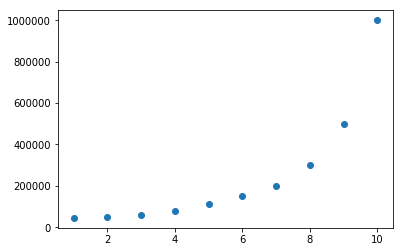

In [5]:
#Plot x and y
plt.scatter(x,y)

In [6]:
# Not required to split data to training and test set as data set contains of only 10 observations
#Fitting Support Vector Regression to dataset
from sklearn.svm import SVR

# Create object of SVR class
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [7]:
#  Predict a new result
y_pred = regressor.predict(6.5)
y_pred

array([130001.55760156])

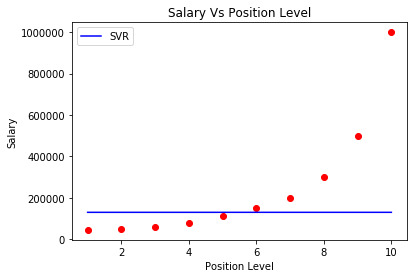

In [8]:
#Visualising Regression Results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue', label='SVR')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

# SVR does not apply future scaling in its algorithm.

In [28]:
# Creating a matrix of features for independent variable, and vector of dependent variable
# Indexes in python start with zero
# Removing last column of dataset, which is dependent variable
# as x select only 1st column i.e 'level' upperbound is not included in python
# we use 1:2 as we need matrix not a vector
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [29]:
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)

x shape (matrix of feature):  (10, 1)
y shape (vector):  (10,)


In [30]:
# Implementing Feature Scaling explicitly
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler class
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
#y = sc_y.fit_transform(y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
y = y.reshape(-1, 1) 
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [34]:
y = sc_y.fit_transform(y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
# Not required to split data to training and test set as data set contains of only 10 observations
#Fitting Support Vector Regression to dataset
from sklearn.svm import SVR

# Create object of SVR class
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

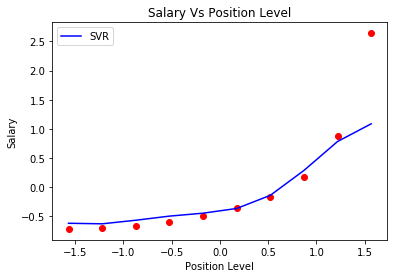

In [38]:
#Visualising Regression Results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue', label='SVR')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

# SVR considers CEO as an outlier, hence it doesnot fit it 

In [39]:
#  Predict a new result
y_pred = regressor.predict(6.5)
y_pred

array([0.01158103])

In [40]:
# Need to transform the data
#  Predict a new result
y_pred = regressor.predict(sc_x.transform(np.array([[6.5]])))
y_pred

array([-0.27861589])

In [41]:
# Use Inverse transform to get original scale of the salary
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

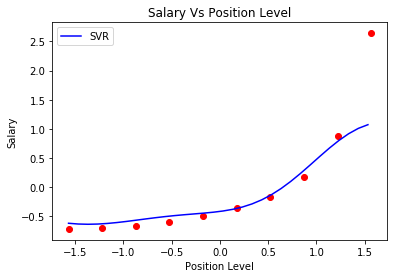

In [44]:
# For better precision, to get a more continuous curve
#Increment from a to 10 with high resolution like 0.1
x_grid = np.arange(min(x), max(x), 0.1)

# We need x_grid as a matrix so we use reshape function
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue', label='SVR')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()